In [27]:
import os
import glob
import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload

In [4]:
logger = logging.getLogger("filamentPlotChloro")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 1

In [5]:
datadir = "/data/SST/CapeGhir/"
figdir = "/data/SST/CapeGhir/figures"
visibledir = "/data/Visible/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*OC.nc")))
nfiles = len(datafilelist)
logger.info("Processing {} files".format(nfiles))

INFO:filamentPlotChloro:Processing 2 files


NameError: name 'self' is not defined

In [15]:
class Chloro(object):
    """
    Chlorophyll concentration
    """

    def __init__(self, lon=None, lat=None, field=None, qflag=None,
                 year=None, dayofyear=None, date=None):
        self.lon = lon
        self.lat = lat
        self.field = field
        self.qflag = qflag
        self.timeunits = year
        self.year = year
        self.dayofyear = dayofyear
        self.date = date
        
    def read_from_oceancolorL2(self, filename):
        """
        Load the SST from netCDF L2 file obtained from
        https://oceancolor.gsfc.nasa.gov
        :param filename: name of the netCDF file
        :return: lon, lat, field, qflag, year, dayofyear
        """

        if os.path.exists(filename):
            with netCDF4.Dataset(filename) as nc:
                # Read platform
                sat = nc.platform
                # Read time information
                # Assume all the measurements made the same day (and same year)
                self.year = int(nc.groups['scan_line_attributes'].variables['year'][0])
                self.dayofyear = int(nc.groups['scan_line_attributes'].variables['day'][0])
                # Convert to date
                self.date = datetime.datetime(self.year, 1, 1) + datetime.timedelta(self.dayofyear - 1)
                # Read coordinates
                self.lon = nc.groups['navigation_data'].variables['longitude'][:]
                self.lat = nc.groups['navigation_data'].variables['latitude'][:]
                # Read geophysical variables
                self.field = nc.groups['geophysical_data'].variables['chlor_a'][:]

In [16]:
chloro = Chloro()

In [17]:
chloro.read_from_oceancolorL2(datafilelist[0])

In [21]:
coordinates = (-19., -6., 25., 35.)
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='h')

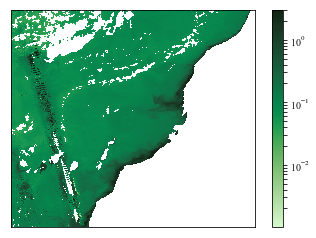

In [31]:
pcm = m.pcolormesh(chloro.lon, chloro.lat, chloro.field, 
                   norm=colors.LogNorm(vmin=chloro.field.min(), vmax=3.0),
                   latlon=True, cmap=cmocean.cm.algae)
cmap = plt.colorbar()
plt.show()
plt.close()

In [24]:
chloro.field.min()

0.001